In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
import seaborn as sns

In [2]:
#충청북도 괴산군_괴산장터_상품리뷰_20200227
review = pd.read_csv("C:/Users/2020_4학년_1학기/캡스톤디자인/product_review1.csv",encoding='cp949')

In [3]:
review.head()

,제목,내용,데이터기준일,긍정0부정1중간2
0,맛은 좋은데 양이 좀 적네요,맛은 좋은데 양이 좀 적네요,2020-02-27,2
1,청결고춧가루 고추잠자리 골드(보통맛),잘 받았습니다.출타중이이어서 늦게 구매확정 후 상품평을 올리게 되었습니다.잘 먹겠습니다.,2020-02-27,0
2,꿀 고구마,꿀 고구마,2020-02-27,0
3,감사합니다,신선하다고 하네요감사합니다,2020-02-27,0
4,울금이 피로회복에 절대강자! 구매했어요,울금은 피로회복에 절대강자!!피곤할때 울금을 물에 타서 마시면 피곤함이 없어져요.오...,2020-02-27,0


In [4]:
review.drop_duplicates(['내용'],keep='first')

,제목,내용,데이터기준일,긍정0부정1중간2
0,맛은 좋은데 양이 좀 적네요,맛은 좋은데 양이 좀 적네요,2020-02-27,2
1,청결고춧가루 고추잠자리 골드(보통맛),잘 받았습니다.출타중이이어서 늦게 구매확정 후 상품평을 올리게 되었습니다.잘 먹겠습니다.,2020-02-27,0
2,꿀 고구마,꿀 고구마,2020-02-27,0
3,감사합니다,신선하다고 하네요감사합니다,2020-02-27,0
4,울금이 피로회복에 절대강자! 구매했어요,울금은 피로회복에 절대강자!!피곤할때 울금을 물에 타서 마시면 피곤함이 없어져요.오...,2020-02-27,0
...,...,...,...,...
274,맛과 모양이 훌륭한 고구마!!!,모험한번 해보자 하는 맘으로 주문했는데 사진과 똑같은 모양에 쪄서 맛을보니 너무...,2020-02-27,0
275,괴산 청결고추,올 김장에 쓸 꼭지달린 마른 통고추를 주문해서 받아보니 청결이란말을 왜 쓰는지 이유...,2020-02-27,1
276,잘 받았어요,절인배추 구입하러 들어왔다가 이벤트 상품이 있길래 구입해봤어요. 신랑 음용해봤는데 ...,2020-02-27,0
277,풋사과즙 맛있어요~,풋사과가 항산화물질인 폴리페놀이 들어있다는것을 어렴풋이 알고있었는데 마침 반값행사한...,2020-02-27,0


In [5]:
# Twitter 패키지의 형태소 분석기 twitter
from konlpy.tag import Twitter
twitter = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
# Twitter를 사용한 특정 품사 추출 함수 생성
def tokenize(text):
    stems = []
    tagged = twitter.pos(text)
    for i in range(0, len(tagged)):
        if (tagged[i][1]=='Noun' or tagged[i][1]=='Adjective') :
            stems.append(tagged[i][0])
    return stems

▲ 명사와 형용사를 추출하기 위한 함수 tokenize.   
형태소 분석 결과를 입력할 리스트 변수 stems 생성   
text에 대해 형태소 분석을 진행해 tagged에 저장.   
for문을 사용해 태그가 명사, 형용사일 때 변수 stem에 저장함.

In [7]:
# Twitter를 사용한 명사 추출
tagged = twitter.pos(review['내용'][0])
for i in range(0, len(tagged)):
    if(tagged[i][1]=='Noun'):
        print(tagged[i])

('맛', 'Noun')
('양', 'Noun')
('좀', 'Noun')


▲ 간단하기 명사를 추출하는 실습   
0번째 택스트에 대해 형태소 분석 진행.   
for문을 사용해 형태소 분석 결과 tag가 noun인 경우만 출력한 결과   

## 문서단어 행렬 구성
> 한국어 형태소 분석기 사용해 추출한 토큰을 바탕으로 문서 단어 행렬 구성   

추출한 토큰을 바탕으로 행렬을 만들어 보려고 함.   
행렬은 TF-IDF값을 산출해서 구성할 것이고 이를 통해 리뷰에서 어떤 단어가 중요한 역할을 하는지 알 수 있다.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

행렬을 만들기 위해 데이터 형식을 변환한다.   
텍스트를 astype 함수를 사용해 문자열 형태 리스트로, 그리고 array 함수를 사용해 배열로 반환   
데이터프레임의 텍스트를 문자열 형태 리스트로 변환하고 함수를 사용해 배열로 변환해 저장하는 내용

In [9]:
text_data_list = review['내용'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

TF-IDF값으로 단어행렬을 생성하는 모듈 vectorizer 만들기    
min_df 를 사용해 단어의 최소 등장 빈도를 2로 설정   
tokenize 함수를 사용해 명사와 형용사를 추출해 사용   

행렬에 대해 normalize를 진행하기 위해 l2, pearson 함수를 사용한 표준화를 설정    
fit_transform함수를 사용해서 문서단어행렬을 구함   
이 행렬을 text_data 변수에 저장.

In [10]:
vectorizer = TfidfVectorizer(min_df=2,tokenizer = tokenize, norm='l1')
text_data = vectorizer.fit_transform(text_data_arr)

이 행렬을 데이터프레임에 입력해 확인해보자.   
df_tfidf에서 행은 문서번호, 열은 token을 나타내고 있음.   
이때 데이터 크기가 크기에 대부분 값들이 0인것을 확인할 수 있다.▼

In [11]:
df_tfidf = pd.DataFrame(text_data.A,columns = vectorizer.get_feature_names())
df_tfidf.head()

,가격,가끔,가루,가을,가장,가족,간,간식,간장,감사,...,향,혹시,화학,확실히,확인,환경호르몬,황금,후,후기,힘들게
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217001,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128786,0.0,0.0


In [12]:
# 그래프에서 한글 깨질 때 방지하기 위한 방법
import matplotlib
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family = font_name)

matplotlib.rcParams['axes.unicode_minus']=False

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


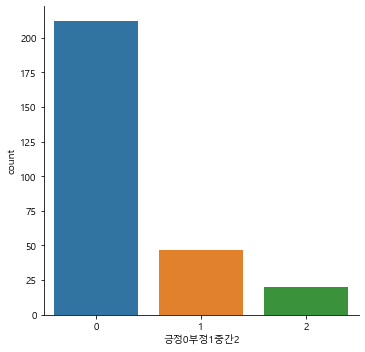

In [13]:
g = sns.factorplot('긍정0부정1중간2',data = review, kind = 'count',size = 5)
g.set_xlabels()

In [14]:
review_data = review['내용'].astype(str).tolist()
review_label = review['긍정0부정1중간2'].astype(str).tolist()

In [15]:
# 얘는 안해도 됨.
X = np.array(pd.DataFrame(review,columns = ['내용']))
y = np.array(pd.DataFrame(review,columns = ['긍정0부정1중간2']))

In [16]:
# 안해도 됨
X

array([['맛은 좋은데 양이 좀 적네요'],
       ['잘 받았습니다.출타중이이어서 늦게 구매확정 후 상품평을 올리게 되었습니다.잘 먹겠습니다.'],
       ['꿀 고구마'],
       ['신선하다고 하네요감사합니다'],
       ['울금은 피로회복에 절대강자!!피곤할때 울금을 물에 타서 마시면 피곤함이 없어져요.오랫만에 다시 울금을 구매했어요.  특히 입안에 혓바늘이 돋았을때 양치 깨끗이 한후에 울금가루를 바르고 자고 일어나면 깨끗하게 혓바늘 돋은 것이 없어지네요'],
       ['빠른배송 고맙습니다.잘 먹겠습니다.'],
       ['빠른배송 고맙습니다.잘 먹겠습니다.'],
       ['빠른배송 고맙습니다.잘 먹겠습니다.'],
       ['믿고 구매하고있어요. 한번씩 세일시 문자주시면 얼릉 들어가서 사기. ㅎ 이번 사과도 깜짝 세일시 얼릉 들어가 산후 맛있게 잘먹었습니다. 감사해요.'],
       ['저렴하게 잘사서 먹고있어요. 두박스나 주문해서 아기 남편 같이 맛있게 먹네요. 감사해요'],
       ['두박스 주문해서 잘먹고있어요. 남편 일하러갈때 한개씩 챙겨주고 아기 주기도 아주좋아요. 감사해요'],
       ['아무것도 첨가 안되있어 좀 쌉싸르한 맛이예요오래된건지 찌꺼기인지 가라앉아서 그런지 끝에 뭐그런거가 있어요'],
       ['수입귀리먹다 이번에 국산을 찾다가 괴산군청에서.관리운영하는 괴산장터를 알게되어 구입했네요.수입보다 깨끗하고 맛도 훨씬 좋아요~또 구매할께요~^^'],
       ['어린아이들과 같이 먹으려고 저염식으로 주문했는데적당히 짜지않게 절여져서 김치 맛있게 할 수 있었어요~또 초록색 겉잎도 챙겨주셔서 김치할 때 우거지로 덮고 저장할 수 있어서 좋았어요^^'],
       ['괴산 옥수수를 접한지도 몇년이 된 것 같습니다옥수수를 무척 좋아하거든요냉동옥수수가 있다는 것 알고 두번째 주문인데도착해서 몇개 먹고 냉동실에 보관하면서생각날때 마다전자렌지에 살짝 돌려 먹으면 간식으로 좋은 것

In [17]:
# 안해도 됨. 오히려 하면 오류날수도 있음ㅜ
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, 
                                                    shuffle=True, #무작위추출
                                                    random_state=1004)

In [18]:
trainset_size = int(round(len(review_data)*0.70))

x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1 : len(review_label)]])

▲ 리스트 형태의 데이터를 기계학습 알고리즘에 적용하기 위해 np.array 함수
를 사용해 형식을 다시 변환하는데 이때 review는 x_train과 x_test로 분할되고,   
점수 데이터인 y은 y_train과 y_test로 분할된다.   
앞에서 구성한 x_train과 x_test는 str 형태이므로, 여기에서 특징 값을 추출하는 작업
을 진행하였다.

In [19]:
# 문서단어 행렬 생성
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [20]:
# 성능평가 결과 입력 데이터프레임 생성
df_per = pd.DataFrame(columns=['Classifier','F-Measure','Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [21]:
#성능평가 패키지 import
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

예측한 값과 실제값을 비교해 모델의 성능을 평가함   
confusion matrix, classification report, accuracy score를 사용함.   
accuracy score의 경우에는 normalize를 True로 설정해 정확도를 계산해 출력하는데 이때 False로 지정할 경우에는 올바르게 분류된 데이터의 건수를 출력함.   

In [22]:
# 나이브베이즈 모델 생성
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train,y_train)
nb_pred = nb_classifier.predict(X_test)
print("\n Confusion Matrix \n")
print(confusion_matrix(y_test,nb_pred))
print('\n Classification Report \n')
print(classification_report(y_test,nb_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test,nb_pred,normalize = True),2))
# 모델 학습 및 예측값을 도출하고 예측값과 실제값 비교해 성능평가에 대한 내용


 Confusion Matrix 

[[52  0  0]
 [24  0  0]
 [ 7  0  0]]

 Classification Report 

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        52
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         7

    accuracy                           0.63        83
   macro avg       0.21      0.33      0.26        83
weighted avg       0.39      0.63      0.48        83


 Accuracy 

0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix를 보면 3x3 행렬   
y축은 실제점수, x축의 값은 예측 점수임.   
점수의 순서는 긍정0, 부정1, 중립2의 순서임.   
긍정 52개, 부정 24개, 중립 7개인데 모두 긍정으로 분류한 것임.   
세 개의 클래스 별로 precision, recall, f-measure를 확인할 수 있음.   
마지막으로 accuracy가 출력됨.   

## 성능저장
성능은 f-measure과 accuracy만 사용해 비교   
f1_score 함수를 사용해 실제 값과 예측 값을 비교해 f-measure를 계산   
이때 average = weight를 설정해 클래스별 가중치를 적용   
 round 함수를 사용해 소수점 2번째 자리까지 표시
fm에 이 값을 저장함▼

In [23]:
fm = round(f1_score(y_test, nb_pred,average='weighted'),2)

accuracy_score 함수를 사용해 마찬가지로 실제 값과 예측 값을 비교해 accuracy를 구함   
normalize = True를 사용해 정확도를 출력   
round 함수를 사용해 소수점 2번째 자리까지 표현   
▼이렇게 구한 정확도를 변수 ac에 저장

In [24]:
ac = round(accuracy_score(y_test,nb_pred,normalize = True),2)

In [25]:
# fm과 ac를 데이터프레임 df_per에 loc함수를 사용해 입력
df_per.loc[len(df_per)]=["Naive Bayes",fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63


## Decision Tree
#### - 의사결정나무
DecisionTreeClassifier패키지 import해서 모델 생성후 fit함수를 사용해 모델 훈련   
predict함수 적용해 예측값을 도출함.    
예측값과 실제값을 비교▼

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train,y_train)#모델학습
dt_pred = dt_classifier.predict(X_test)#예측값 도출

print('\n Confusion Matricx \n')
print(confusion_matrix(y_test,dt_pred))
print('\n Classification Reprot \n')
print(classification_report(y_test,dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred,normalize = True),2))


 Confusion Matricx 

[[46  2  4]
 [13  9  2]
 [ 6  1  0]]

 Classification Reprot 

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.75      0.38      0.50        24
           2       0.00      0.00      0.00         7

    accuracy                           0.66        83
   macro avg       0.49      0.42      0.43        83
weighted avg       0.66      0.66      0.64        83


 Accuracy 

0.66


긍정0, 부정1, 중립2에서 긍정0은 52개중 46개가 긍정, 4개가 부정,2개가 중립으로 판단되었고,   
부정1의 24개 중에서 18개는 잘분류되었으나 15개는 긍정, 1개는 중립으로 판단되었으며,   
중립 7개중에서 5개는 긍정, 2개는 부정으로 판단되었고 제대로 분류된 것은 0개이다.   

In [27]:
# 성능저장
fm = round(f1_score(y_test,dt_pred, average = 'weighted'),2)
ac = round(accuracy_score(y_test, dt_pred, normalize = True),2)
df_per.loc[len(df_per)]=['Decision Tree',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.64,0.66


## Random Forest
#### 랜덤포레스트

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)#fit함수로 모델훈련
rf_pred = rf_classifier.predict(X_test)#predict로 예측값 추출

#성능평가결과출력
print("\n Confusion Matrix \n")
print(confusion_matrix(y_test,rf_pred))
print('\n Classification Reprot \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test,rf_pred,normalize = True),2))


 Confusion Matrix 

[[52  0  0]
 [23  1  0]
 [ 7  0  0]]

 Classification Reprot 

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        52
           1       1.00      0.04      0.08        24
           2       0.00      0.00      0.00         7

    accuracy                           0.64        83
   macro avg       0.54      0.35      0.29        83
weighted avg       0.69      0.64      0.51        83


 Accuracy 

0.64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# 시험해보는 중
from sklearn.model_selection import GridSearchCV
import numpy as np 

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100,200],
    'max_features': [1,3,5],
    'max_depth': [2,3,5]
}

gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)#fit함수로 모델훈련
# 그리드서치 학습결과출력
print('베스트 하이퍼 파라미터 : {0}'.format(gs.best_params_))
print('베스트 하이퍼 파라미터일 때 정확도:{0:.2f}'.format(gs.best_score_))

#최적화 모델 추출
model = gs.best_estimator_

#test 정확도 출력
score = model.score(X_test,y_test)
print('테스트세트에서 정확도 : {0:.2f}'.format(score))

#test세트 예측결과 샘플출력
rf_pred = model.predict(X_test)#predict로 예측값 추출

#성능평가결과출력
#print("\n Confusion Matrix \n")
#print(confusion_matrix(y_test,rf_pred))
#print('\n Classification Reprot \n')
#print(classification_report(y_test, rf_pred))
#print('\n Accuracy \n')
#print(round(accuracy_score(y_test,rf_pred,normalize = True),2))

베스트 하이퍼 파라미터 : {'max_depth': 2, 'max_features': 1, 'n_estimators': 100}
베스트 하이퍼 파라미터일 때 정확도:0.82
테스트세트에서 정확도 : 0.63


랜덤포레스트를 사용하여 긍정0의 52개는 잘 분류가 되었음을 확인할 수 있음.   
부정1의 24개중 22개는 긍정으로 인식했고 2개만 부정으로 인식했음.   
중립2의 7개를 긍정으로 인식했음. 제대로 인식한게 없음.   

In [30]:
fm = round(f1_score(y_test,rf_pred,average='weighted'),2)
ac = round(accuracy_score(y_test,rf_pred,normalize = True),2)
df_per.loc[len(df_per)]=['Random Forest',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.64,0.66
2,Random Forest,0.48,0.63


## Support Vector Machine
#### 서포터 벡터 머신

In [31]:
from sklearn.svm import LinearSVC
# LinearSVC 패키지를 import

svm_classifier = LinearSVC().fit(X_train,y_train) # fit함수로 모델 훈련
svm_pred = svm_classifier.predict(X_test) # predict함수를 사용해 예측값 추출

# 예측값과 실제값 비교해 성능평가
# SVM 모델성능평가
print("\n Confusion Matrix \n")
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Reprot \n')
print(classification_report(y_test,svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize = True),2))


 Confusion Matrix 

[[52  0  0]
 [24  0  0]
 [ 7  0  0]]

 Classification Reprot 

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        52
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00         7

    accuracy                           0.63        83
   macro avg       0.21      0.33      0.26        83
weighted avg       0.39      0.63      0.48        83


 Accuracy 

0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


긍정0은 52개 잘 분류되고, 부정과 중립은 모두 긍정으로 잘못 분류되었음.

In [32]:
# 성능저장
fm = round(f1_score(y_test,svm_pred, average = 'weighted'),2)
ac = round(accuracy_score(y_test,svm_pred,normalize = True),2)
df_per.loc[len(df_per)]=['Support Vector Machine',fm,ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.48,0.63
1,Decision Tree,0.64,0.66
2,Random Forest,0.48,0.63
3,Support Vector Machine,0.48,0.63


#### 성능비교
이렇게 저장한 데이터프레임의 성능을 시각화해 비교해보자.   
분류기명 classifier를 index로 설정하기 위해 set_index함수 사용.   
결과를 보면 classifier, 분류 알고리즘명이 index가 되고 이에따른 f-measure와 accuracy가 정리되어있음을 확인할 수 있음.   


In [33]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.48,0.63
Decision Tree,0.64,0.66
Random Forest,0.48,0.63
Support Vector Machine,0.48,0.63


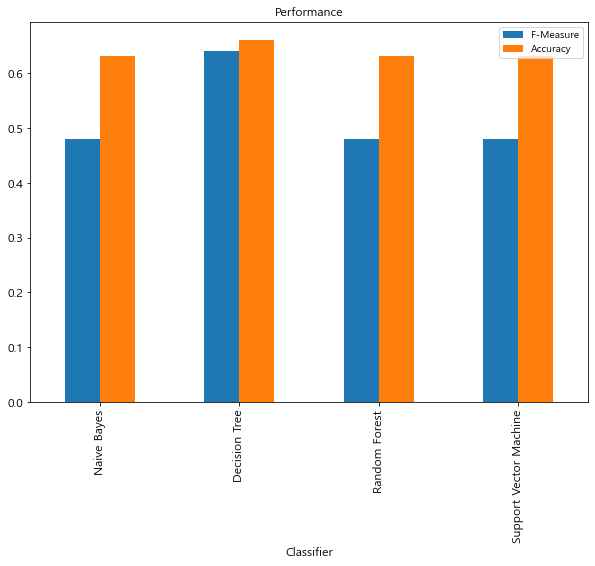

In [34]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar',title = 'Performance',
                                            figsize =(10,7),legend = True, fontsize = 12)
ax.set_xlabel('Classifier',fontsize = 12)
plt.show()

의사결정나무가 f_measure나 accuracy에서 가장 우수함을 쉽게 확인할 수 있음.    
의사결정나무 다음으로는 성능이 모두 비슷함.